In [9]:
print('Start importing required libraries...')
import os, sys, time
sys.path.append('../')
from tqdm.auto import tqdm
import allel
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
torch.autograd.set_detect_anomaly(True)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
from collections import Counter
import gzip
import tagore
from scipy.interpolate import interp1d

from lainet.models.network_constructor import get_network
from lainet.utils.eval import compute_accuracy, AccuracyLogger, complete_sk_eval, print_sk_eval
from lainet.utils.reader import load_founders_from_vcf_and_map, load_results_file
from lainet.utils.output_writer import get_meta_data, write_msp_tsv
from lainet.training import train_main, eval_predictions
from lainet.inference import inference_main 

print('Done importing')

#importing module (only for jupytercluster)
exec(open("/shared/software/modules/4.6.1/init/python.py").read(), globals())
module("load", "bcftools")

module("load","conda")
os.system("source activate TER")
print("conda env has been loaded")
print("bcftools has been loaded")

Start importing required libraries...
Done importing
conda env has been loaded
bcftools has been loaded


In [10]:
config_path = 'configs/test-small.yaml'
data_folder= '../data/input/real/'

founders_vcf_file_path = data_folder+ '5pop_1500sample.vcf.gz'
founders_map_file_path = data_folder+ '5pop_1500sample.smap'

query_vcf_file_path = data_folder+ '5pop_250query.vcf.gz'
genetic_map=data_folder +'allchrs_b37.gmap'

output_folder_prefix = '../data/output_lainet/lnetwork/1500samples_250query/'
if (os.path.isdir(output_folder_prefix)==False):
    os.mkdir(output_folder_prefix)
    print('Creating directory')

chm=1
# Load vcf and map files and config
config = yaml.load(open(config_path), Loader=yaml.FullLoader)

print(config)

{'MODEL': {'NETWORK': 'lainet', 'WINDOW_SIZE': 500}, 'TRAINING': {'DEVICE': 'cpu', 'OPTIM': 'Adam', 'ALPHA': 0.5, 'LEARNING_RATE': 0.01, 'WEIGHT_DECAY': 0.0, 'BATCH_SIZE': 128, 'BALANCED_TYPE': 'Batch', 'ONLINE_SIMULATION_MODE': 'pre-defined', 'ONLINE_SIMULATION_REALISTIC': True, 'GENERATION_NUM_LIST': [2, 4, 16, 32, 64], 'RANDOM_TRAINVAL_SPLIT': False, 'ITER_BREAK': 10, 'NUM_EPOCHS': 500, 'SAVE_MODEL': True}}


In [ ]:
## Training
train_main(config, founders_vcf_file_path, founders_map_file_path, output_folder_prefix,chm,genetic_map)

Loading vcf and .map files...
Done loading vcf and .map files...
A total of 1499 diploid individuals where found in the vcf and .map
A total of 5 ancestries where found: ['AFR' 'AMR' 'EAS' 'EUR' 'SAS']
A total of 2698 sequences are used for training and 300 for validation...
A total of 5 unique categories in train and 5 in val
Reading genetic map from... ../data/input/real/allchrs_b37.gmap
Information of models saved in ../data/output_lainet/lnetwork/1500samples_250query/_info.npy...
Creating Network...
Starting training...
Saving network in... ../data/output_lainet/lnetwork/1500samples_250query/_0__network_model.pth
Using genetic map for realistic simulation
Validation set of shape torch.Size([550, 175618]) has been simulated...
10539
[     1] loss: 0.840
 accuracy is: 20.12 - Best is: 20.12 - Difference is: 0.00 - Time since best: 0
[     3] loss: 1.688
[     5] loss: 1.468
[     7] loss: 1.427
[     9] loss: 1.380
[    11] loss: 1.337
 accuracy is: 27.51 - Best is: 27.51 - Differenc

In [87]:
## Inference
net, predicted, probs, val_snps = inference_main(config, query_vcf_file_path, output_folder_prefix, output_folder_prefix)

Starting inference...
Loading best performing networks...
Loading Meta-data...
Loading query vcf in...../data/from_github/5pop_50query.vcf.gz
- Number of SNPs from model: 175618
- Number of SNPs from file: 175618
- Number of intersecting SNPs: 175618
- Percentage of model SNPs covered by query file: 100.0%
Running network...
torch.Size([50, 702, 2])
Writing .msp file...
Done writing


In [31]:
print('Plotting results!')
output_file = output_folder_prefix+"msp.tsv"

msp_df = pd.read_csv(output_file, sep="\t")
msp_df

Plotting results!


#Subpopulation order/codes: AFR=0  \
#chm spos      epos      sgpos egpos n snps NA19393.0 NA19393.1 HG02322.0 HG02322.1 HG01958.0 HG01958.1 HG02332.0 HG02332.1 HG02317.0 HG02317.1 HG03372.0 HG03372.1 HG02675.0 HG02675.1 HG02337.0 HG02337.1 HG02464.0 HG02464.1 NA18881.0 NA18881.1 HG00628.0 HG00628.1 NA18964.0 NA18964.1 HG02395.0 HG02395.1 HG02356.0 HG02356.1 HG01862.0 HG01862.1 NA18962.0 NA18962.1 HG01853.0 HG01853.1 HG03856.0 HG03856.1 NA18989.0 NA18989.1 HG03694.0 HG03694.1 NA20906.0 NA20906.1 NA18602.0 NA18602.1 NA19002.0 NA19002.1 HG01624.0 HG01624.1 HG03999.0 HG03999.1 HG03713.0 HG03713.1 HG03911.0 HG03911.1 HG00345.0 HG00345.1 HG03977.0 HG03977.1 HG00355.0 HG00355.1 HG03925.0 HG03925.1 HG04019.0 HG04019.1 HG00364.0 HG00364.1 HG01518.0 HG01518.1 HG01122.0 HG01122.1 HG00265.0 HG00265.1 HG01187.0 HG01187.1 HG03963.0 HG03963.1 HG01572.0 HG01572.1 HG00328.0 HG00328.1 HG01992.0 HG01992.1 HG00315.0 HG00315.1 NA19717.0 NA19717.1 HG01924.0 HG01924.1 NA20822.0 NA20822.1 HG01073.0 HG01073.1 HG01951.0 HG01951.1 HG01305.0                         HG01305.1   
1    534247    987200    1     1     250    0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         2         2         2         2         2         4         2         2         2         2         2         2         2         2         4         4         2         2         4         4         4         4         2         2         2         2         3         3         4         4         4         4         2         4         1         1         4         4         3         3         3         4         4         1         3         3         3         3         1         3         3         4         1         3         4         4         1         1         3         3         1         1         1         4         0         3         2         1         4         1         3         3         1         1         1                                         1   
     987670    1213305   1     1     250    0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         2         2         2         2         2         4         2         2         2         2         2         2         2         2         4         4         2         2         4         4         4         4         2         2         2         2         3         3         4         4         4         4         2         4         1         1         4         4         3         3         3         4         4         1         3         3         3         3         1         3         3         4         1         3         4         4         1         1         3         3         1         1         1         4         0         3         2         1         4         1         3         3         1         1         1                                         1   
     1213496   1619767   1     1     250    0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         2         2         2         2         2         4         2         2         2         2         2         2         2         2         4         4         2         2         4         4         4         4         2         2         2         2         3         3         4         4         4         4         2         4         1         1         4         4         3         3         3         4         4         1         3         3         3         3         1         3         3         4         1         3         4         4         1         1         3         3         1         1         1     

## Measuring performance

In [32]:
from scipy import stats
from sklearn.metrics import confusion_matrix

from lainet.postprocess import get_samples_from_msp_df
from lainet.visualization import plot_cm, plot_chm

%load_ext autoreload
%autoreload 2

In [36]:
msp_df = pd.read_csv(output_file, sep="\t",skiprows=[0])
# reading the sample-ids
query_samples = get_samples_from_msp_df(msp_df)

# reading predictions for each of the intervals
pred_labels = (np.array(msp_df)[:,6:].T).astype(int)
# reducing it to only 1 of maternal/paternal prediction
single_ind_idx = np.arange(0,len(query_samples)*2,2)
pred_labels_single_ind = pred_labels[single_ind_idx,:]


# predicting single ancestry by taking mode of local predictions for each individual
y_pred = stats.mode(pred_labels_single_ind,axis=1)[0].squeeze() 

# get model population order from first line of file and convert from numeric predictions
with open(output_file, "r") as f:
    pop = np.array([p.split("=")[0] for p in f.readline().split()[2:]])
pred_pop = [pop[pop_ind] for pop_ind in y_pred]

# put it together in dataframe
pred_df = pd.DataFrame({"Sample": query_samples, "Prediction": pred_pop})


## Adding the true labels

In [38]:
# adding the true labels
all_sample_map_file=data_folder + 'all_sample.smap'
all_sample_map_df = pd.read_csv(all_sample_map_file, sep="\t",skiprows=[0])
all_sample_map_df.columns = ['Sample', 'Superpopulation code']
true_labels_df = all_sample_map_df[["Sample", "Superpopulation code"]]
true_labels_df.columns = ["Sample", "Population"]
pred_df = pred_df.merge(true_labels_df)
print(pred_df)

     Sample Prediction Population
0   NA19393        AFR        AFR
1   HG02322        AFR        AFR
2   HG01958        AFR        AFR
3   HG02332        AFR        AFR
4   HG02317        AFR        AFR
5   HG03372        AFR        AFR
6   HG02675        AFR        AFR
7   HG02337        AFR        AFR
8   HG02464        AFR        AFR
9   NA18881        AFR        AFR
10  HG00628        EAS        EAS
11  NA18964        EAS        EAS
12  HG02395        EAS        EAS
13  HG02356        EAS        EAS
14  HG01862        EAS        EAS
15  NA18962        EAS        EAS
16  HG01853        EAS        EAS
17  HG03856        SAS        SAS
18  NA18989        EAS        EAS
19  HG03694        SAS        SAS
20  NA20906        SAS        SAS
21  NA18602        EAS        EAS
22  NA19002        EAS        EAS
23  HG01624        EUR        EUR
24  HG03999        SAS        SAS
25  HG03713        SAS        SAS
26  HG03911        SAS        SAS
27  HG00345        EUR        EUR
28  HG03977   

In [39]:
# Getting the prediction accuracy
acc = np.mean(pred_df.Population == pred_df.Prediction)

print("Accuracy for single ancestry: ", acc*100, "%", sep="")

#writting accuracy in a file
res=pd.read_csv("../data/res.tsv",delimiter='\t',header=0)
res.append([)



Accuracy for single ancestry: 98.0%


AttributeError: 'DataFrame' object has no attribute 'concat'

In [42]:
?pd.DataFrame.append

Signature:
pd.DataFrame.append(
    self,
    other,
    ignore_index: 'bool' = False,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
) -> 'DataFrame'
Docstring:
Append rows of `other` to the end of caller, returning a new object.

Columns in `other` that are not in the caller are added as new columns.

Parameters
----------
other : DataFrame or Series/dict-like object, or list of these
    The data to append.
ignore_index : bool, default False
    If True, the resulting axis will be labeled 0, 1, …, n - 1.
verify_integrity : bool, default False
    If True, raise ValueError on creating index with duplicates.
sort : bool, default False
    Sort columns if the columns of `self` and `other` are not aligned.

    .. versionchanged:: 1.0.0

        Changed to not sort by default.

Returns
-------
DataFrame
    A new DataFrame consisting of the rows of caller and the rows of `other`.

See Also
--------
concat : General function to concatenate DataFrame or Series objects.

N

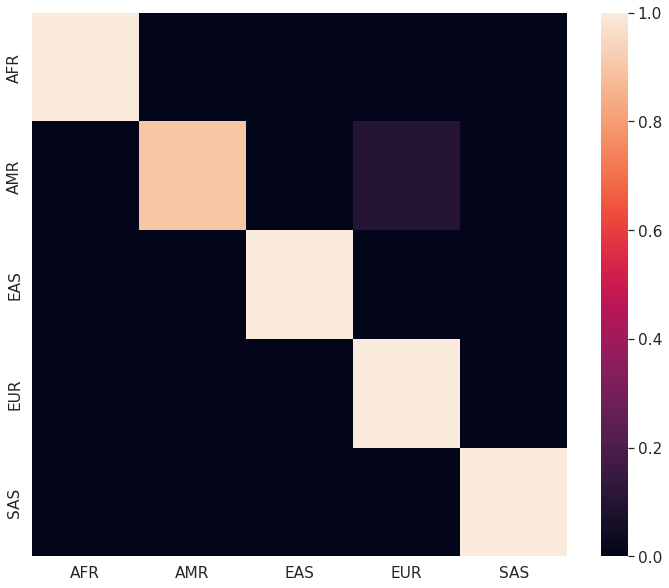

In [93]:
# creating and visualizing the confusion matrix
labs = np.unique(pred_df[['Population', 'Prediction']])
cm = confusion_matrix(pred_df.Population, pred_df.Prediction, labels=labs)
cm_plot = plot_cm(cm, normalize=True, labels=labs)
cm_plot.figure.savefig('../output_lainet/lnetwork/confusion_matrix.png')

## Plotting the prediction

tagore --i ./tagore.tsv -p ../output_lainet/chm_im --build hg37 -f


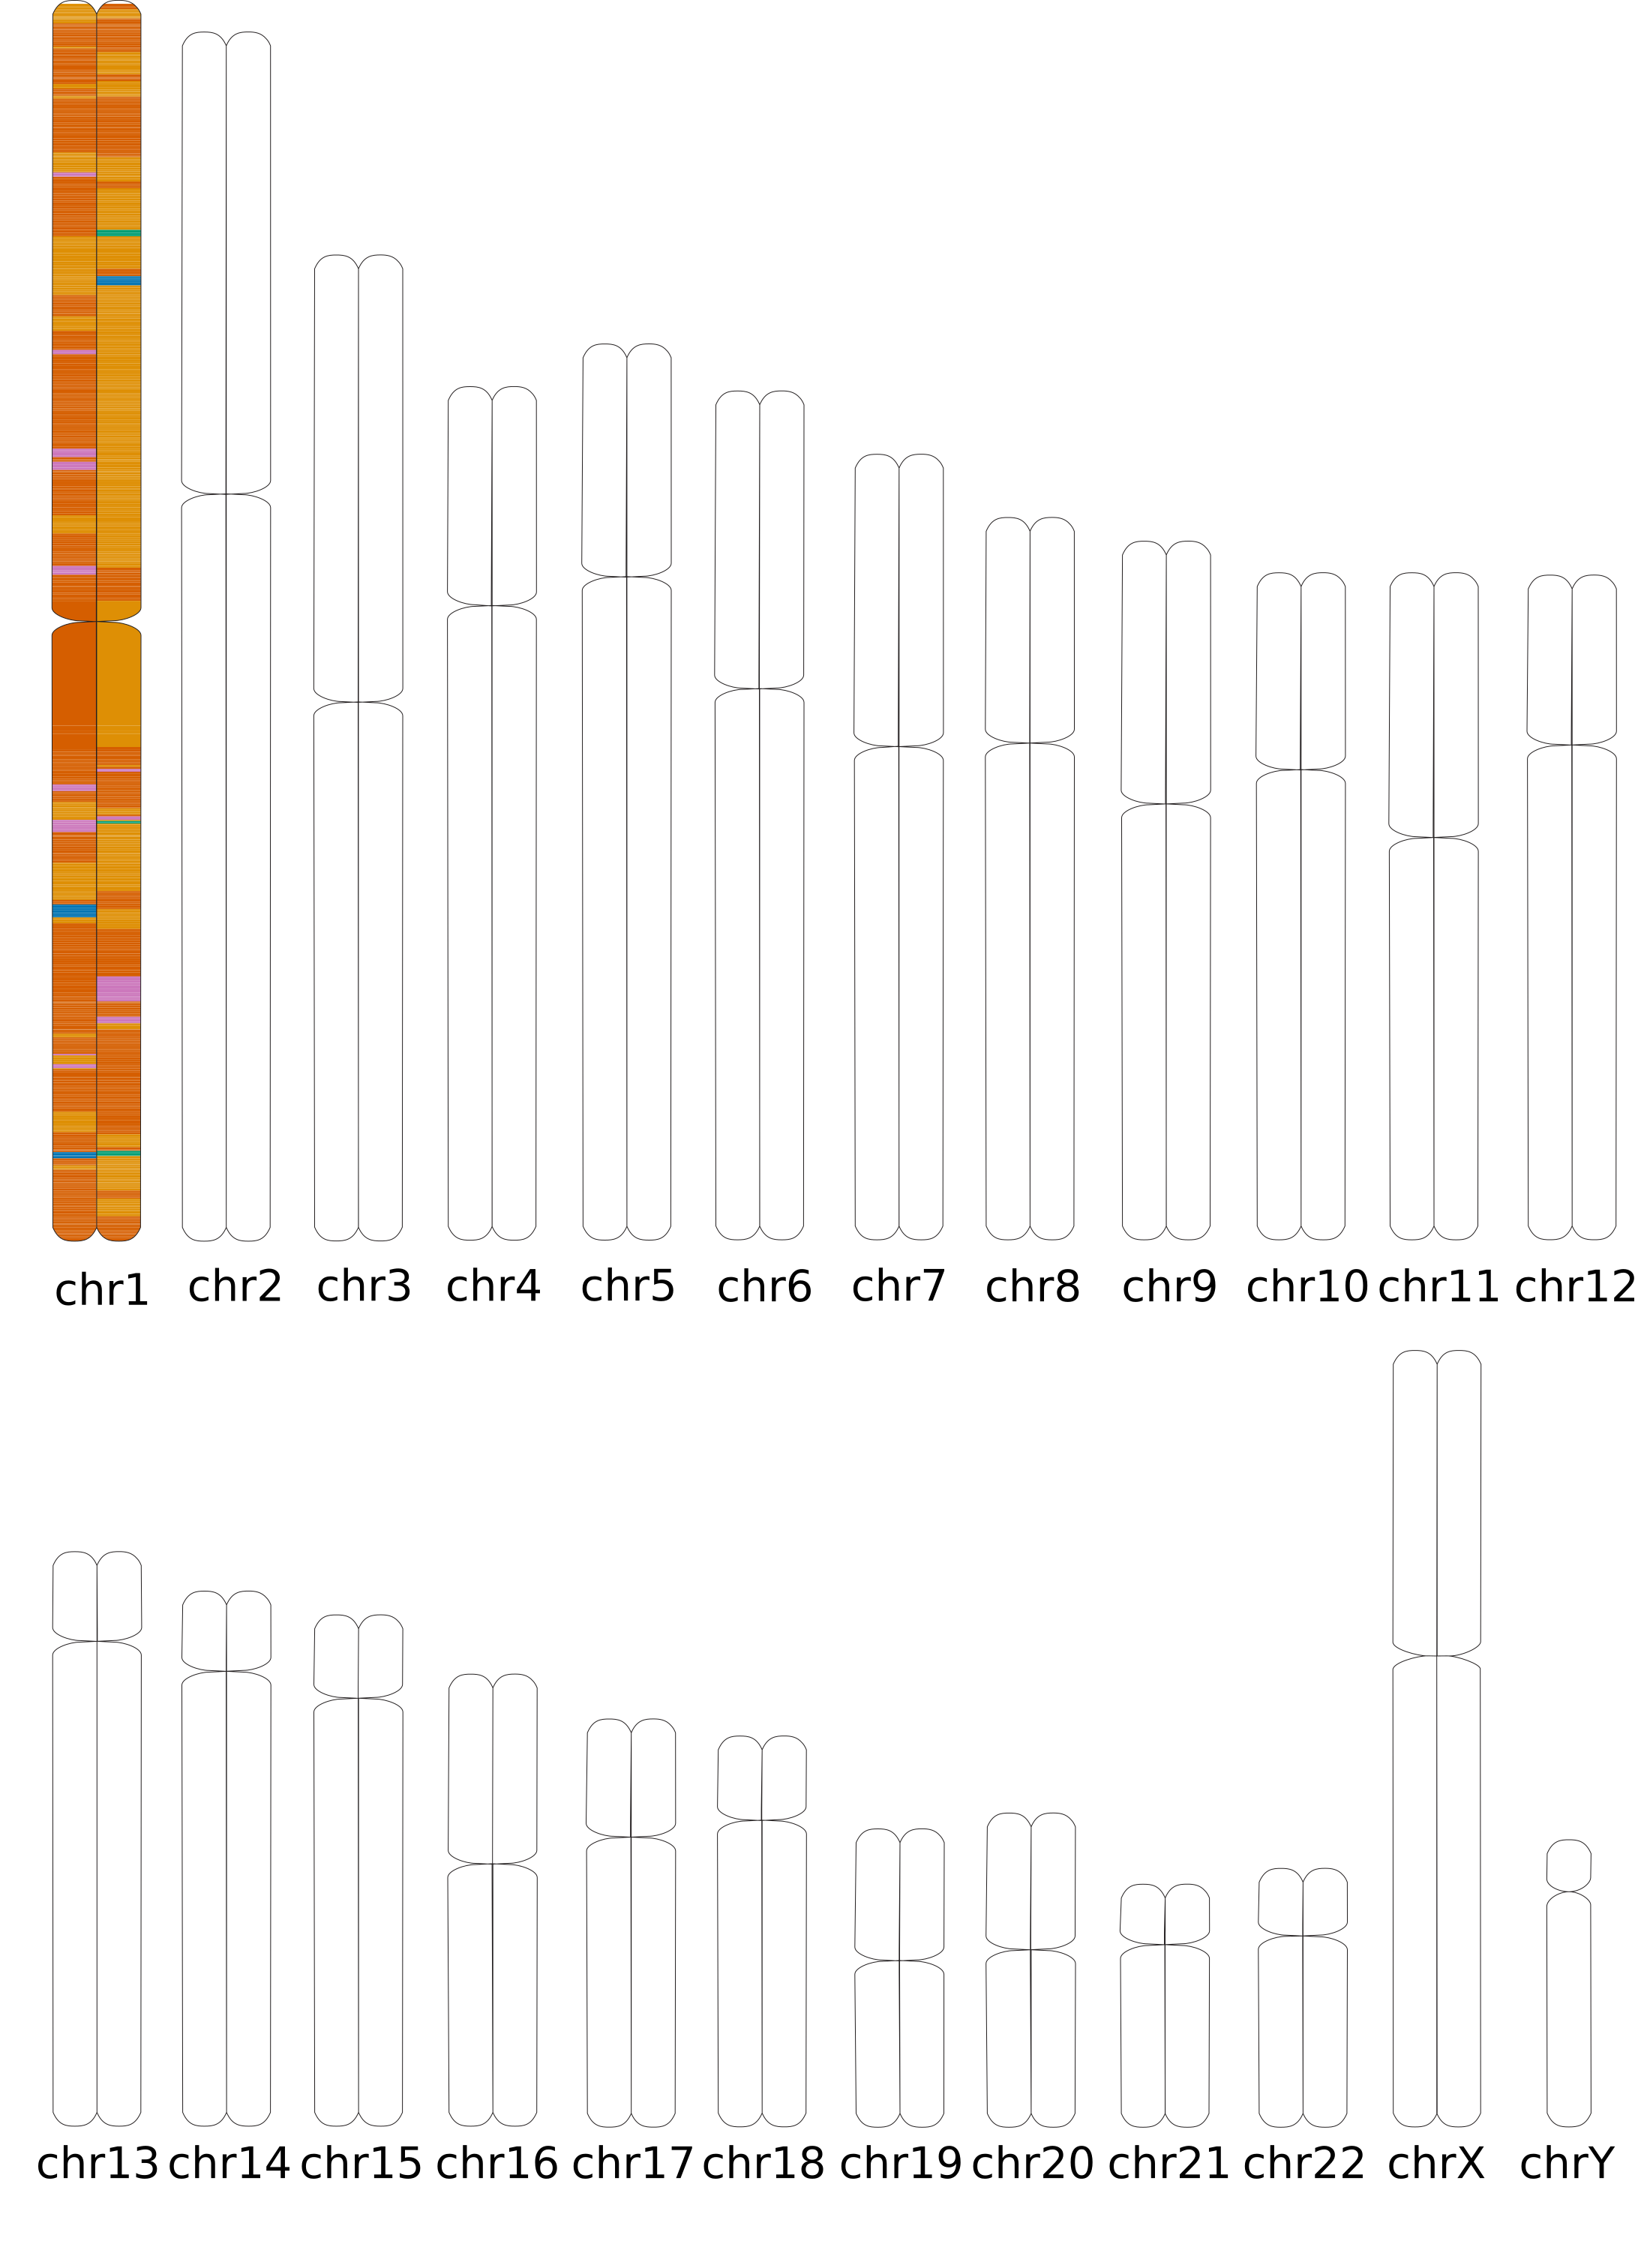

In [ ]:
from IPython.display import Image

sample_id = "HG01122" # looking at just one random sample
img_name = "../output_lainet/chm_im"
plot_chm(sample_id, msp_df, img_name=img_name)
Image(filename=img_name+".png")